# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2021.12.10

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216

This data is DNA of smFISH RNA:
    \\10.245.74.158\Chromatin_NAS_6\20211216-P_brain_CTP12-RNA



In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

creating new log file
2022-01-06 20:43:59,642 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
33580


# 0. fov parameters

In [13]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':[r'\\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216',
                            r'\\10.245.74.158\Chromatin_NAS_6\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216',],
             'save_folder':r'M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216',
             'experiment_type': 'DNA',
             'num_threads': 20,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


In [14]:
_overwrite = False
#sel_fov_ids = np.concatenate([np.arange(30,53), np.arange(55,60)])
#sel_fov_ids = np.arange(60,90)

sel_fov_ids = np.arange(0,120)

for _fov_id in sel_fov_ids:

    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=False,
                                _overwrite_spot=True,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.parallel = True
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=True,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=_overwrite, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    #
    #break
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.
-- checking combo, region:[3 4] in 0.010s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.010s.
-- checking combo, region:[ 9 10] in 0.020s.
-- checking combo, region:[11 12] in 0.017s.
-- checking combo, region:[13 14] in 0.022s.
-- checking combo, region:[15 16] in 0.011s.
-- checking combo, region:[17 18] in 0.009s.
-- checking combo, region:[19 20] in 0.010s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.010s.
-- checking combo, region:[27 28] in 0.020s.
-- checking combo, region:[29 30] in 0.010s.
-- checking combo, region:[31 32] in 0.010s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.010s.
-- checking combo, region:[39 40] in 0.020s.
-- checking combo, region:[41 42] in 0.010s.
-- che

-- checking combo, region:[99] in 0.018s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 6109.73s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.017s.
-- checking unique, region:[3 4] in 0.009s.
-- checking unique, region:[5 6] in 0.009s.
-- checking unique, region:[7 8] in 0.009s.
-- checking unique, region:[ 9 10] in 0.007s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.008s.
-- checking unique, region:[15 16] in 0.002s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.958s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_004.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_004.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_004.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder',

-- checking combo, region:[41 42] in 0.042s.
-- checking combo, region:[43 44] in 0.035s.
-- checking combo, region:[45 46] in 0.032s.
-- checking combo, region:[47 48] in 0.030s.
-- checking combo, region:[49 50] in 0.040s.
-- checking combo, region:[51 52] in 0.030s.
-- checking combo, region:[53 54] in 0.068s.
-- checking combo, region:[55 56] in 0.034s.
-- checking combo, region:[57 58] in 0.027s.
-- checking combo, region:[59 60] in 0.030s.
-- checking combo, region:[61 62] in 0.039s.
-- checking combo, region:[63 64] in 0.030s.
-- checking combo, region:[65 66] in 0.051s.
-- checking combo, region:[67 68] in 0.038s.
-- checking combo, region:[69 70] in 0.032s.
-- checking combo, region:[71 72] in 0.030s.
-- checking combo, region:[73 74] in 0.030s.
-- checking combo, region:[75 76] in 0.030s.
-- checking combo, region:[77 78] in 0.030s.
-- checking combo, region:[79 80] in 0.062s.
-- checking combo, region:[81 82] in 0.030s.
-- checking combo, region:[83 84] in 0.030s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U13', 'H63U14'])
- 64 folders are found according to color-usage annotation.
+ loading fov_info f

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.032s.
-- checking combo, region:[3 4] in 0.020s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.020s.
-- checking combo, region:[ 9 10] in 0.023s.
-- checking combo, region:[11 12] in 0.017s.
-- checking combo, region:[13 14] in 0.040s.
-- checking combo, region:[15 16] in 0.020s.
-- checking combo, region:[17 18] in 0.020s.
-- checking combo, region:[19 20] in 0.020s.
-- checking combo, region:[21 22] in 0.020s.
-- checking combo, region:[23 24] in 0.020s.
-- checking combo, region:[25 26] in 0.020s.
-- checking combo, region:[27 28] in 0.050s.
-- checking combo, region:[29 30] in 0.020s.
-- checking combo, region:[31 32] in 0.020s.
-- checking combo, region:[33 34] in 0.020s.
-- checking combo, region:[35 36] in 0.020s.
-- checking combo, region:[37 38] in 0.018s.
-- checking combo, region:[39 40] in 0.032s.
-- checking combo, region:[41 42] in 0.020s.
-- che

 97 98 99] , finish in 5899.13s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.018s.
-- checking unique, region:[3 4] in 0.002s.
-- checking unique, region:[5 6] in 0.015s.
-- checking unique, region:[7 8] in 0.006s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.008s.
-- checking unique, region:[15 16] in 0.002s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region:[21 22] in 0.010s.
-- checking unique, region:[23 24] in 0.008s.
-- checking unique, region:[25 26] in 0.002s.
-- checking unique, region:[27 28] in 0.010s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_011.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_011.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.345s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.040s.


-- checking combo, region:[75 76] in 0.012s.
-- checking combo, region:[77 78] in 0.020s.
-- checking combo, region:[79 80] in 0.030s.
-- checking combo, region:[81 82] in 0.020s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.020s.
-- checking combo, region:[87 88] in 0.018s.
-- checking combo, region:[89 90] in 0.012s.
-- checking combo, region:[91 92] in 0.030s.
-- checking combo, region:[93 94] in 0.012s.
-- checking combo, region:[95 96] in 0.020s.
-- checking combo, region:[97 98] in 0.010s.
-- checking combo, region:[99] in 0.018s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 4514.

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_014.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.711s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_014.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_014.hdf5
++ base attributes loaded:[] in 0.007s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_014.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[47 48] in 0.020s.
-- checking combo, region:[49 50] in 0.028s.
-- checking combo, region:[51 52] in 0.020s.
-- checking combo, region:[53 54] in 0.040s.
-- checking combo, region:[55 56] in 0.020s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.020s.
-- checking combo, region:[61 62] in 0.012s.
-- checking combo, region:[63 64] in 0.012s.
-- checking combo, region:[65 66] in 0.040s.
-- checking combo, region:[67 68] in 0.021s.
-- checking combo, region:[69 70] in 0.020s.
-- checking combo, region:[71 72] in 0.018s.
-- checking combo, region:[73 74] in 0.020s.
-- checking combo, region:[75 76] in 0.012s.
-- checking combo, region:[77 78] in 0.020s.
-- checking combo, region:[79 80] in 0.049s.
-- checking combo, region:[81 82] in 0.018s.
-- checking combo, region:[83 84] in 0.020s.
-- checking combo, region:[85 86] in 0.021s.
-- checking combo, region:[87 88] in 0.019s.
-- checking combo, region:[89 90] in 0.012s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.
-- checking combo, region:[3 4] in 0.010s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.010s.
-- checking combo, region:[ 9 10] in 0.010s.
-- checking combo, region:[11 12] in 0.010s.
-- checking combo, region:[13 14] in 0.020s.
-- checking combo, region:[15 16] in 0.010s.
-- checking combo, region:[17 18] in 0.010s.
-- checking combo, region:[19 20] in 0.010s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.010s.
-- checking combo, region:[27 28] in 0.022s.
-- checking combo, region:[29 30] in 0.010s.
-- checking combo, region:[31 32] in 0.010s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.010s.
-- checking combo, region:[39 40] in 0.020s.
-- checking combo, region:[41 42] in 0.018s.
-- che

 97 98 99] , finish in 4881.99s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.012s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.011s.
-- checking unique, region:[7 8] in 0.009s.
-- checking unique, region:[ 9 10] in 0.009s.
-- checking unique, region:[11 12] in 0.003s.
-- checking unique, region:[13 14] in 0.009s.
-- checking unique, region:[15 16] in 0.010s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.008s.
-- checking unique, region:[21 22] in 0.002s.
-- checking unique, region:[23 24] in 0.010s.
-- checking unique, region:[25 26] in 0.010s.
-- checking unique, region:[27 28] in 0.008s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_021.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_021.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.657s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.040s.


-- checking combo, region:[71 72] in 0.015s.
-- checking combo, region:[73 74] in 0.017s.
-- checking combo, region:[75 76] in 0.018s.
-- checking combo, region:[77 78] in 0.012s.
-- checking combo, region:[79 80] in 0.038s.
-- checking combo, region:[81 82] in 0.012s.
-- checking combo, region:[83 84] in 0.020s.
-- checking combo, region:[85 86] in 0.010s.
-- checking combo, region:[87 88] in 0.020s.
-- checking combo, region:[89 90] in 0.020s.
-- checking combo, region:[91 92] in 0.030s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.020s.
-- checking combo, region:[97 98] in 0.020s.
-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 7

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_024.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.907s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_024.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_024.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_024.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[39 40] in 0.030s.
-- checking combo, region:[41 42] in 0.020s.
-- checking combo, region:[43 44] in 0.018s.
-- checking combo, region:[45 46] in 0.012s.
-- checking combo, region:[47 48] in 0.020s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.020s.
-- checking combo, region:[53 54] in 0.030s.
-- checking combo, region:[55 56] in 0.020s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.012s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.031s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.020s.
-- checking combo, region:[71 72] in 0.020s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.020s.
-- checking combo, region:[77 78] in 0.020s.
-- checking combo, region:[79 80] in 0.030s.
-- checking combo, region:[81 82] in 0.020s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_027.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.683s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_027.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_027.hdf5
++ base attributes loaded:[] in 0.007s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_027.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[39 40] in 0.022s.
-- checking combo, region:[41 42] in 0.010s.
-- checking combo, region:[43 44] in 0.010s.
-- checking combo, region:[45 46] in 0.018s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.030s.
-- checking combo, region:[55 56] in 0.010s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.022s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.030s.
-- checking combo, region:[81 82] in 0.010s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_030.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.728s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_030.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_030.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_030.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[35 36] in 0.020s.
-- checking combo, region:[37 38] in 0.021s.
-- checking combo, region:[39 40] in 0.029s.
-- checking combo, region:[41 42] in 0.020s.
-- checking combo, region:[43 44] in 0.020s.
-- checking combo, region:[45 46] in 0.018s.
-- checking combo, region:[47 48] in 0.012s.
-- checking combo, region:[49 50] in 0.020s.
-- checking combo, region:[51 52] in 0.020s.
-- checking combo, region:[53 54] in 0.040s.
-- checking combo, region:[55 56] in 0.020s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.018s.
-- checking combo, region:[61 62] in 0.012s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.030s.
-- checking combo, region:[67 68] in 0.020s.
-- checking combo, region:[69 70] in 0.020s.
-- checking combo, region:[71 72] in 0.018s.
-- checking combo, region:[73 74] in 0.012s.
-- checking combo, region:[75 76] in 0.020s.
-- checking combo, region:[77 78] in 0.021s.
-- checkin

- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12', 'H62U13', 'H63U14'])
- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Con

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.038s.
-- checking combo, region:[3 4] in 0.012s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.010s.
-- checking combo, region:[ 9 10] in 0.014s.
-- checking combo, region:[11 12] in 0.007s.
-- checking combo, region:[13 14] in 0.030s.
-- checking combo, region:[15 16] in 0.010s.
-- checking combo, region:[17 18] in 0.010s.
-- checking combo, region:[19 20] in 0.010s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.018s.
-- checking combo, region:[27 28] in 0.022s.
-- checking combo, region:[29 30] in 0.010s.
-- checking combo, region:[31 32] in 0.018s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.012s.
-- checking combo, region:[39 40] in 0.020s.
-- checking combo, region:[41 42] in 0.018s.
-- che

 97 98 99] , finish in 3822.34s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.018s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.003s.
-- checking unique, region:[7 8] in 0.002s.
-- checking unique, region:[ 9 10] in 0.014s.
-- checking unique, region:[11 12] in 0.006s.
-- checking unique, region:[13 14] in 0.010s.
-- checking unique, region:[15 16] in 0.000s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region:[21 22] in 0.010s.
-- checking unique, region:[23 24] in 0.010s.
-- checking unique, region:[25 26] in 0.008s.
-- checking unique, region:[27 28] in 0.002s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_037.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_037.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.638s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.032s.


-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.020s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.010s.
-- checking combo, region:[87 88] in 0.010s.
-- checking combo, region:[89 90] in 0.010s.
-- checking combo, region:[91 92] in 0.030s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.010s.
-- checking combo, region:[99] in 0.008s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 3549.

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_040.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.711s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_040.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_040.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_040.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[41 42] in 0.015s.
-- checking combo, region:[43 44] in 0.005s.
-- checking combo, region:[45 46] in 0.010s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.030s.
-- checking combo, region:[55 56] in 0.010s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.030s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.028s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.040s.
-- checking combo, region:[3 4] in 0.010s.
-- checking combo, region:[5 6] in 0.018s.
-- checking combo, region:[7 8] in 0.012s.
-- checking combo, region:[ 9 10] in 0.013s.
-- checking combo, region:[11 12] in 0.007s.
-- checking combo, region:[13 14] in 0.030s.
-- checking combo, region:[15 16] in 0.012s.
-- checking combo, region:[17 18] in 0.010s.
-- checking combo, region:[19 20] in 0.010s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.018s.
-- checking combo, region:[25 26] in 0.012s.
-- checking combo, region:[27 28] in 0.030s.
-- checking combo, region:[29 30] in 0.010s.
-- checking combo, region:[31 32] in 0.020s.
-- checking combo, region:[33 34] in 0.020s.
-- checking combo, region:[35 36] in 0.020s.
-- checking combo, region:[37 38] in 0.020s.
-- checking combo, region:[39 40] in 0.038s.
-- checking combo, region:[41 42] in 0.020s.
-- che

 97 98 99] , finish in 4815.31s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.010s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.010s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.008s.
-- checking unique, region:[13 14] in 0.002s.
-- checking unique, region:[15 16] in 0.002s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region:[21 22] in 0.010s.
-- checking unique, region:[23 24] in 0.008s.
-- checking unique, region:[25 26] in 0.002s.
-- checking unique, region:[27 28] in 0.010s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_047.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_047.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.655s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.020s.


-- checking combo, region:[93 94] in 0.023s.
-- checking combo, region:[95 96] in 0.008s.
-- checking combo, region:[97 98] in 0.002s.
-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 2268.88s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.018s.
-- checking unique, region:[3 4] in 0.002s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.010s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.008s.
-- checking unique, region:[1

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_050.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.894s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_050.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_050.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_050.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[41 42] in 0.010s.
-- checking combo, region:[43 44] in 0.010s.
-- checking combo, region:[45 46] in 0.010s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.030s.
-- checking combo, region:[55 56] in 0.010s.
-- checking combo, region:[57 58] in 0.018s.
-- checking combo, region:[59 60] in 0.012s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.018s.
-- checking combo, region:[65 66] in 0.022s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.018s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.018s.
-- checking combo, region:[77 78] in 0.012s.
-- checking combo, region:[79 80] in 0.030s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.018s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_053.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.736s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_053.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_053.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_053.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.010s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.008s.
-- checking combo, region:[71 72] in 0.002s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.008s.
-- checking combo, region:[79 80] in 0.002s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.008s.
-- checking combo, region:[87 88] in 0.002s.
-- checking combo, region:[89 90] in 0.010s.
-- checking combo, region:[91 92] in 0.010s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.008s.
-- checking combo, region:[97 98] in 0.002s.
-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 1

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_056.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.705s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_056.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_056.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_056.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[65 66] in 0.010s.
-- checking combo, region:[67 68] in 0.002s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.008s.
-- checking combo, region:[75 76] in 0.002s.
-- checking combo, region:[77 78] in 0.020s.
-- checking combo, region:[79 80] in 0.010s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.008s.
-- checking combo, region:[87 88] in 0.002s.
-- checking combo, region:[89 90] in 0.010s.
-- checking combo, region:[91 92] in 0.010s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.008s.
-- checking combo, region:[97 98] in 0.002s.
-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_059.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.763s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_059.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_059.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_059.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[43 44] in 0.010s.
-- checking combo, region:[45 46] in 0.012s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.020s.
-- checking combo, region:[55 56] in 0.018s.
-- checking combo, region:[57 58] in 0.012s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.020s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.028s.
-- checking combo, region:[67 68] in 0.012s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.020s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.018s.
-- checking combo, region:[77 78] in 0.012s.
-- checking combo, region:[79 80] in 0.028s.
-- checking combo, region:[81 82] in 0.012s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.018s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.040s.
-- checking combo, region:[3 4] in 0.020s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.018s.
-- checking combo, region:[ 9 10] in 0.012s.
-- checking combo, region:[11 12] in 0.010s.
-- checking combo, region:[13 14] in 0.038s.
-- checking combo, region:[15 16] in 0.012s.
-- checking combo, region:[17 18] in 0.010s.
-- checking combo, region:[19 20] in 0.018s.
-- checking combo, region:[21 22] in 0.012s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.010s.
-- checking combo, region:[27 28] in 0.040s.
-- checking combo, region:[29 30] in 0.028s.
-- checking combo, region:[31 32] in 0.022s.
-- checking combo, region:[33 34] in 0.020s.
-- checking combo, region:[35 36] in 0.020s.
-- checking combo, region:[37 38] in 0.020s.
-- checking combo, region:[39 40] in 0.040s.
-- checking combo, region:[41 42] in 0.020s.
-- che

-- checking combo, region:[99] in 0.016s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 7720.40s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.012s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.005s.
-- checking unique, region:[7 8] in 0.010s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.010s.
-- checking unique, region:[15 16] in 0.008s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.002s.
-- checking unique, region

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.704s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_066.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_066.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_066.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder',

-- checking combo, region:[47 48] in 0.028s.
-- checking combo, region:[49 50] in 0.022s.
-- checking combo, region:[51 52] in 0.020s.
-- checking combo, region:[53 54] in 0.040s.
-- checking combo, region:[55 56] in 0.028s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.022s.
-- checking combo, region:[61 62] in 0.020s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.040s.
-- checking combo, region:[67 68] in 0.020s.
-- checking combo, region:[69 70] in 0.028s.
-- checking combo, region:[71 72] in 0.020s.
-- checking combo, region:[73 74] in 0.022s.
-- checking combo, region:[75 76] in 0.020s.
-- checking combo, region:[77 78] in 0.020s.
-- checking combo, region:[79 80] in 0.040s.
-- checking combo, region:[81 82] in 0.020s.
-- checking combo, region:[83 84] in 0.028s.
-- checking combo, region:[85 86] in 0.022s.
-- checking combo, region:[87 88] in 0.020s.
-- checking combo, region:[89 90] in 0.020s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.050s.
-- checking combo, region:[3 4] in 0.017s.
-- checking combo, region:[5 6] in 0.016s.
-- checking combo, region:[7 8] in 0.018s.
-- checking combo, region:[ 9 10] in 0.017s.
-- checking combo, region:[11 12] in 0.016s.
-- checking combo, region:[13 14] in 0.043s.
-- checking combo, region:[15 16] in 0.018s.
-- checking combo, region:[17 18] in 0.016s.
-- checking combo, region:[19 20] in 0.015s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.018s.
-- checking combo, region:[25 26] in 0.022s.
-- checking combo, region:[27 28] in 0.049s.
-- checking combo, region:[29 30] in 0.028s.
-- checking combo, region:[31 32] in 0.022s.
-- checking combo, region:[33 34] in 0.030s.
-- checking combo, region:[35 36] in 0.020s.
-- checking combo, region:[37 38] in 0.028s.
-- checking combo, region:[39 40] in 0.043s.
-- checking combo, region:[41 42] in 0.026s.
-- che

-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 4602.35s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.010s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.008s.
-- checking unique, region:[ 9 10] in 0.002s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.011s.
-- checking unique, region:[15 16] in 0.010s.
-- checking unique, region:[17 18] in 0.008s.
-- checking unique, region:[19 20] in 0.002s.
-- checking unique, region

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.725s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_073.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_073.hdf5
++ base attributes loaded:[] in 0.006s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_073.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder',

-- checking combo, region:[47 48] in 0.020s.
-- checking combo, region:[49 50] in 0.020s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.038s.
-- checking combo, region:[55 56] in 0.012s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.018s.
-- checking combo, region:[61 62] in 0.012s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.028s.
-- checking combo, region:[67 68] in 0.017s.
-- checking combo, region:[69 70] in 0.015s.
-- checking combo, region:[71 72] in 0.018s.
-- checking combo, region:[73 74] in 0.012s.
-- checking combo, region:[75 76] in 0.020s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.030s.
-- checking combo, region:[81 82] in 0.020s.
-- checking combo, region:[83 84] in 0.018s.
-- checking combo, region:[85 86] in 0.012s.
-- checking combo, region:[87 88] in 0.018s.
-- checking combo, region:[89 90] in 0.012s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.
-- checking combo, region:[3 4] in 0.010s.
-- checking combo, region:[5 6] in 0.010s.
-- checking combo, region:[7 8] in 0.010s.
-- checking combo, region:[ 9 10] in 0.019s.
-- checking combo, region:[11 12] in 0.011s.
-- checking combo, region:[13 14] in 0.020s.
-- checking combo, region:[15 16] in 0.018s.
-- checking combo, region:[17 18] in 0.011s.
-- checking combo, region:[19 20] in 0.012s.
-- checking combo, region:[21 22] in 0.011s.
-- checking combo, region:[23 24] in 0.011s.
-- checking combo, region:[25 26] in 0.007s.
-- checking combo, region:[27 28] in 0.020s.
-- checking combo, region:[29 30] in 0.018s.
-- checking combo, region:[31 32] in 0.010s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.010s.
-- checking combo, region:[39 40] in 0.022s.
-- checking combo, region:[41 42] in 0.011s.
-- che

+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 3629.62s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.012s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.010s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.008s.
-- checking unique, region:[13 14] in 0.002s.
-- checking unique, region:[15 16] in 0.010s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.010s.
-- checking unique, region:[21 22] in 0.008s.
-- checking unique, re

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.752s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_080.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_080.hdf5
++ base attributes loaded:[] in 0.000s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_080.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder',

-- checking combo, region:[49 50] in 0.017s.
-- checking combo, region:[51 52] in 0.015s.
-- checking combo, region:[53 54] in 0.038s.
-- checking combo, region:[55 56] in 0.012s.
-- checking combo, region:[57 58] in 0.020s.
-- checking combo, region:[59 60] in 0.020s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.030s.
-- checking combo, region:[67 68] in 0.020s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.020s.
-- checking combo, region:[73 74] in 0.020s.
-- checking combo, region:[75 76] in 0.018s.
-- checking combo, region:[77 78] in 0.012s.
-- checking combo, region:[79 80] in 0.038s.
-- checking combo, region:[81 82] in 0.012s.
-- checking combo, region:[83 84] in 0.020s.
-- checking combo, region:[85 86] in 0.020s.
-- checking combo, region:[87 88] in 0.018s.
-- checking combo, region:[89 90] in 0.012s.
-- checking combo, region:[91 92] in 0.030s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_083.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.710s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_083.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_083.hdf5
++ base attributes loaded:[] in 0.007s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_083.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[37 38] in 0.010s.
-- checking combo, region:[39 40] in 0.028s.
-- checking combo, region:[41 42] in 0.010s.
-- checking combo, region:[43 44] in 0.012s.
-- checking combo, region:[45 46] in 0.010s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.028s.
-- checking combo, region:[55 56] in 0.012s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.013s.
-- checking combo, region:[65 66] in 0.025s.
-- checking combo, region:[67 68] in 0.012s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.028s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.
-- checking combo, region:[3 4] in 0.018s.
-- checking combo, region:[5 6] in 0.011s.
-- checking combo, region:[7 8] in 0.012s.
-- checking combo, region:[ 9 10] in 0.012s.
-- checking combo, region:[11 12] in 0.012s.
-- checking combo, region:[13 14] in 0.028s.
-- checking combo, region:[15 16] in 0.012s.
-- checking combo, region:[17 18] in 0.011s.
-- checking combo, region:[19 20] in 0.012s.
-- checking combo, region:[21 22] in 0.011s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.010s.
-- checking combo, region:[27 28] in 0.028s.
-- checking combo, region:[29 30] in 0.012s.
-- checking combo, region:[31 32] in 0.010s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.020s.
-- checking combo, region:[39 40] in 0.030s.
-- checking combo, region:[41 42] in 0.020s.
-- che

 97 98 99] , finish in 1114.16s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.020s.
-- checking unique, region:[3 4] in 0.008s.
-- checking unique, region:[5 6] in 0.008s.
-- checking unique, region:[7 8] in 0.008s.
-- checking unique, region:[ 9 10] in 0.009s.
-- checking unique, region:[11 12] in 0.008s.
-- checking unique, region:[13 14] in 0.008s.
-- checking unique, region:[15 16] in 0.008s.
-- checking unique, region:[17 18] in 0.006s.
-- checking unique, region:[19 20] in 0.007s.
-- checking unique, region:[21 22] in 0.010s.
-- checking unique, region:[23 24] in 0.008s.
-- checking unique, region:[25 26] in 0.002s.
-- checking unique, region:[27 28] in 0.010s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_090.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_090.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.685s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.020s.


-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.010s.
-- checking combo, region:[99] in 0.008s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 2116.56s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.012s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.008s.
-- checking unique, region:[ 9 10] in 0.002s.
-- checking unique, region:[11 12] in 0.010s.
-- checking unique, region:[13 14] in 0.010s.
-- checking unique, region:[1

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_093.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.711s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_093.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_093.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_093.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.010s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.008s.
-- checking combo, region:[71 72] in 0.002s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.008s.
-- checking combo, region:[79 80] in 0.010s.
-- checking combo, region:[81 82] in 0.002s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.010s.
-- checking combo, region:[87 88] in 0.010s.
-- checking combo, region:[89 90] in 0.008s.
-- checking combo, region:[91 92] in 0.002s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.010s.
-- checking combo, region:[99] in 0.000s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_096.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.682s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_096.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_096.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_096.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.007s.
-- checking combo, region:[63 64] in 0.008s.
-- checking combo, region:[65 66] in 0.012s.
-- checking combo, region:[67 68] in 0.008s.
-- checking combo, region:[69 70] in 0.002s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.008s.
-- checking combo, region:[79 80] in 0.011s.
-- checking combo, region:[81 82] in 0.008s.
-- checking combo, region:[83 84] in 0.002s.
-- checking combo, region:[85 86] in 0.010s.
-- checking combo, region:[87 88] in 0.010s.
-- checking combo, region:[89 90] in 0.010s.
-- checking combo, region:[91 92] in 0.010s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.008s.
-- checking combo, region:[99] in 0.002s.
+ Start multi-processing of pre-processing for 50 images w

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_099.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.718s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_099.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_099.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_099.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[59 60] in 0.002s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.010s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.010s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checking combo, region:[85 86] in 0.010s.
-- checking combo, region:[87 88] in 0.010s.
-- checking combo, region:[89 90] in 0.008s.
-- checking combo, region:[91 92] in 0.010s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.002s.
-- checking combo, region:[99] in 0.010s.
+ Start multi-processing of pre-processing for 50 images w

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_102.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.707s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_102.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_102.hdf5
++ base attributes loaded:[] in 0.010s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_102.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[45 46] in 0.012s.
-- checking combo, region:[47 48] in 0.008s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.008s.
-- checking combo, region:[53 54] in 0.012s.
-- checking combo, region:[55 56] in 0.002s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.010s.
-- checking combo, region:[67 68] in 0.018s.
-- checking combo, region:[69 70] in 0.012s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.023s.
-- checking combo, region:[81 82] in 0.007s.
-- checking combo, region:[83 84] in 0.018s.
-- checking combo, region:[85 86] in 0.012s.
-- checking combo, region:[87 88] in 0.010s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_105.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.676s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_105.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_105.hdf5
++ base attributes loaded:[] in 0.002s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_105.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[41 42] in 0.018s.
-- checking combo, region:[43 44] in 0.010s.
-- checking combo, region:[45 46] in 0.010s.
-- checking combo, region:[47 48] in 0.010s.
-- checking combo, region:[49 50] in 0.010s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.022s.
-- checking combo, region:[55 56] in 0.010s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.010s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.020s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.010s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.011s.
-- checking combo, region:[79 80] in 0.019s.
-- checking combo, region:[81 82] in 0.010s.
-- checking combo, region:[83 84] in 0.010s.
-- checkin

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_108.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.721s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_108.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_108.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_108.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[39 40] in 0.030s.
-- checking combo, region:[41 42] in 0.010s.
-- checking combo, region:[43 44] in 0.010s.
-- checking combo, region:[45 46] in 0.010s.
-- checking combo, region:[47 48] in 0.018s.
-- checking combo, region:[49 50] in 0.012s.
-- checking combo, region:[51 52] in 0.010s.
-- checking combo, region:[53 54] in 0.020s.
-- checking combo, region:[55 56] in 0.010s.
-- checking combo, region:[57 58] in 0.010s.
-- checking combo, region:[59 60] in 0.012s.
-- checking combo, region:[61 62] in 0.010s.
-- checking combo, region:[63 64] in 0.010s.
-- checking combo, region:[65 66] in 0.020s.
-- checking combo, region:[67 68] in 0.010s.
-- checking combo, region:[69 70] in 0.018s.
-- checking combo, region:[71 72] in 0.010s.
-- checking combo, region:[73 74] in 0.010s.
-- checking combo, region:[75 76] in 0.010s.
-- checking combo, region:[77 78] in 0.010s.
-- checking combo, region:[79 80] in 0.028s.
-- checking combo, region:[81 82] in 0.012s.
-- checkin

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_4\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33C34', 'H34C35', 'H35C36', 'H36C37', 'H37C38', 'H38C39', 'H39C40', 'H40C41', 'H41C42', 'H42C43', 'H43C44', 'H44C45', 'H45C46', 'H46C47', 'H47C48', 'H48C49', 'H49C50', 'H50U1', 'H51U2', 'H52U3', 'H53U4', 'H54U5', 'H55U6', 'H56U7', 'H57U8', 'H58U9', 'H59U10', 'H60U11', 'H61U12

-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.
-- checking combo, region:[3 4] in 0.010s.
-- checking combo, region:[5 6] in 0.018s.
-- checking combo, region:[7 8] in 0.010s.
-- checking combo, region:[ 9 10] in 0.010s.
-- checking combo, region:[11 12] in 0.012s.
-- checking combo, region:[13 14] in 0.028s.
-- checking combo, region:[15 16] in 0.010s.
-- checking combo, region:[17 18] in 0.012s.
-- checking combo, region:[19 20] in 0.010s.
-- checking combo, region:[21 22] in 0.010s.
-- checking combo, region:[23 24] in 0.010s.
-- checking combo, region:[25 26] in 0.010s.
-- checking combo, region:[27 28] in 0.020s.
-- checking combo, region:[29 30] in 0.010s.
-- checking combo, region:[31 32] in 0.010s.
-- checking combo, region:[33 34] in 0.010s.
-- checking combo, region:[35 36] in 0.010s.
-- checking combo, region:[37 38] in 0.012s.
-- checking combo, region:[39 40] in 0.028s.
-- checking combo, region:[41 42] in 0.020s.
-- che

 97 98 99] , finish in 6249.90s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.010s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8] in 0.008s.
-- checking unique, region:[ 9 10] in 0.010s.
-- checking unique, region:[11 12] in 0.002s.
-- checking unique, region:[13 14] in 0.010s.
-- checking unique, region:[15 16] in 0.010s.
-- checking unique, region:[17 18] in 0.010s.
-- checking unique, region:[19 20] in 0.000s.
-- checking unique, region:[21 22] in 0.010s.
-- checking unique, region:[23 24] in 0.010s.
-- checking unique, region:[25 26] in 0.010s.
-- checking unique, region:[27 28] in 0.008s.
- No unique images and spots requires processing, skip.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 34
- Number of field of views: 211
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 30
- Number of field of views: 211
- Importin

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_115.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_115.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'combo_ref_im', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'unique_ref_im', 'use_dapi', 'verbose'] in 24.646s.
-- folders not selected, allow processing all 64 folders
-- checking combo, region:[1 2] in 0.030s.


-- checking combo, region:[85 86] in 0.018s.
-- checking combo, region:[87 88] in 0.012s.
-- checking combo, region:[89 90] in 0.010s.
-- checking combo, region:[91 92] in 0.030s.
-- checking combo, region:[93 94] in 0.010s.
-- checking combo, region:[95 96] in 0.010s.
-- checking combo, region:[97 98] in 0.018s.
-- checking combo, region:[99] in 0.002s.
+ Start multi-processing of pre-processing for 50 images with 20 threads
++ processing combo ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] , finish in 6444.91s.
-- folders not selected, allow processing all 64 folders
-- checking unique, region:[1 2] in 0.012s.
-- checking unique, region:[3 4] in 0.010s.
-- checking unique, region:[5 6] in 0.010s.
-- checking unique, region:[7 8

- 64 folders are found according to color-usage annotation.
+ loading fov_info from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_118.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 6.770s.
+ loading correction from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_118.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_118.hdf5
++ base attributes loaded:[] in 0.007s.
-- saving fov_info to file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_118.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 

-- checking combo, region:[47 48] in 0.021s.
-- checking combo, region:[49 50] in 0.020s.
-- checking combo, region:[51 52] in 0.020s.
-- checking combo, region:[53 54] in 0.031s.
-- checking combo, region:[55 56] in 0.018s.
-- checking combo, region:[57 58] in 0.019s.
-- checking combo, region:[59 60] in 0.018s.
-- checking combo, region:[61 62] in 0.019s.
-- checking combo, region:[63 64] in 0.020s.
-- checking combo, region:[65 66] in 0.030s.
-- checking combo, region:[67 68] in 0.020s.
-- checking combo, region:[69 70] in 0.019s.
-- checking combo, region:[71 72] in 0.018s.
-- checking combo, region:[73 74] in 0.018s.
-- checking combo, region:[75 76] in 0.018s.
-- checking combo, region:[77 78] in 0.018s.
-- checking combo, region:[79 80] in 0.033s.
-- checking combo, region:[81 82] in 0.018s.
-- checking combo, region:[83 84] in 0.018s.
-- checking combo, region:[85 86] in 0.020s.
-- checking combo, region:[87 88] in 0.019s.
-- checking combo, region:[89 90] in 0.018s.
-- checkin

In [5]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ims = _grp['ims'][:]
    #combo_ids = _grp['ids'][:]

In [6]:
fov._load_from_file('combo')

+ loading combo from file: M:\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Conv_zscan_000.hdf5
++ finish loading combo in 0.142s. 


In [11]:
from ImageAnalysis3.classes.preprocess import Spots3D, ImageCrop_3d, SpotTuple

with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['combo']
    combo_ids = _grp['ids'][:]
    raw_combo_spots_list = [Spots3D(_spots[_spots[:,0]>0], bits= _id)
                                    for _id, _spots in zip(combo_ids, _grp['raw_spots'][:])]

<IPython.core.display.Javascript object>


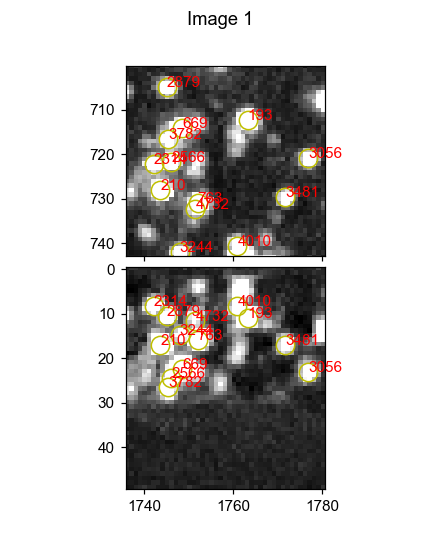

In [12]:
spots_imshow_dict = {'coords':[],
                     'class_ids':[],
                    }

for _i,_spots in enumerate(raw_combo_spots_list):
    spots_imshow_dict['coords'].extend(list(np.fliplr(_spots.to_coords())))
    #spots_imshow_dict['class_ids'].extend(list(_spots.bits))
    spots_imshow_dict['class_ids'].extend(list(_i * np.ones(len(_spots), dtype=np.int32)))

visual_tools.imshow_mark_3d_v2(combo_ims, given_dic=spots_imshow_dict)

<IPython.core.display.Javascript object>


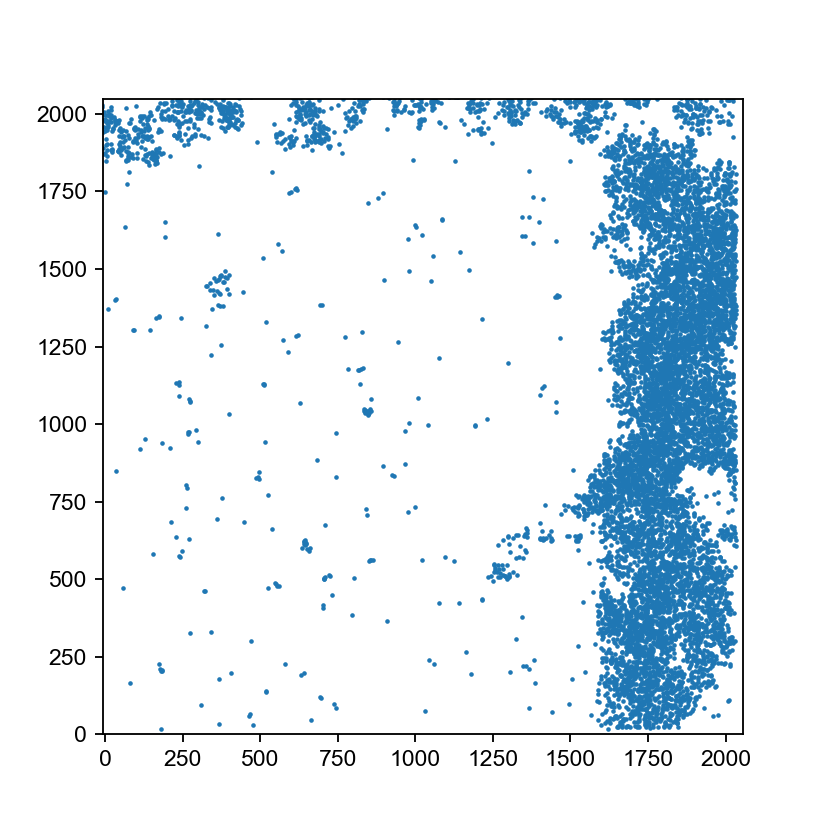

(10151, 10157)

In [7]:
plt.figure(figsize=(5,5),dpi=150)
spots = fov.combo_spots_list[3]
sel_inds = spots[:,0] > 2500
plt.scatter(spots[sel_inds,3], spots[sel_inds,2], s=1)
plt.axis('equal')
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.show()
np.sum(sel_inds), len(sel_inds)

In [14]:
fov.combo_drifts

array([[  0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ],
       [ -1.0766667,   2.7133334,  -9.67     ],
       [ -1.0766667,   2.7133334,  -9.67     ],
       [ -1.1366667,   1.1833333,  -8.1      ],
       [ -1.1366667,   1.1833333,  -8.1      ],
       [ -1.5      ,  -1.0533333,  -5.98     ],
       [ -1.5      ,  -1.0533333,  -5.98     ],
       [ -1.38     ,  -1.1866666,  -4.75     ],
       [ -1.38     ,  -1.1866666,  -4.75     ],
       [ -1.56     ,  -1.3966666,  -6.08     ],
       [ -1.56     ,  -1.3966666,  -6.08     ],
       [ -1.5433333,  -0.88     , -10.81     ],
       [ -1.5433333,  -0.88     , -10.81     ],
       [ -1.4133333,  -2.31     ,  -7.653333 ],
       [ -1.4133333,  -2.31     ,  -7.653333 ],
       [ -1.3366667,  -2.18     ,  -8.866667 ],
       [ -1.3366667,  -2.18     ,  -8.866667 ],
       [ -1.4266666,  -2.35     ,  -7.6633334],
       [ -1.4266666,  -2.35     ,  -7.6633334],
       [ -1.2466667,  -2.64     , -11.08

In [1]:
visual_tools.imshow_mark_3d_v2(combo_ims)

NameError: name 'visual_tools' is not defined